<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [48]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1st.week,2nd.week,3rd.week,...,56th.week,57th.week,58th.week,59th.week,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', '1st.week', '2nd.week', '3rd.week', '4th.week',
       '5th.week', '6th.week', '7th.week', '8th.week', '9th.week', '10th.week',
       '11th.week', '12th.week', '13th.week', '14th.week', '15th.week',
       '16th.week', '17th.week', '18th.week', '19th.week', '20th.week',
       '21st.week', '22nd.week', '23rd.week', '24th.week', '25th.week',
       '26th.week', '27th.week', '28th.week', '29th.week', '30th.week',
       '31st.week', '32nd.week', '33rd.week', '34th.week', '35th.week',
       '36th.week', '37th.week', '38th.week', '39th.week', '40th.week',
       '41st.week', '42nd.week', '43rd.week', '44th.week', '45th.week',
       '46th.week', '47th.week', '48th.week', '49th.week', '50th.week',
       '51st.week', '52nd.week', '53rd.week', '54th.week', '55th.week',
       '56th.week', '57th.week', '58th.week', '59th.week', '60th.week',
       '61st.week', '62nd.week', '63rd.week', '64th.we

In [3]:
df.shape

(317, 83)

In [44]:
df = df.where((pd.notnull(df)),0)

blanks = [] 
for i in df.columns:
    try:
        if sum(df[i]) == 0:
            blanks.append(i)
    except:
        continue

df = df.drop(columns = blanks)

df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [51]:
df.columns = [i.replace('x','') for i in df.columns]
df = df.rename(columns = {'artist.inverted' : 'artist'})

In [52]:
df.columns

Index(['year', 'artist', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', '1st.week', '2nd.week', '3rd.week', '4th.week',
       '5th.week', '6th.week', '7th.week', '8th.week', '9th.week', '10th.week',
       '11th.week', '12th.week', '13th.week', '14th.week', '15th.week',
       '16th.week', '17th.week', '18th.week', '19th.week', '20th.week',
       '21st.week', '22nd.week', '23rd.week', '24th.week', '25th.week',
       '26th.week', '27th.week', '28th.week', '29th.week', '30th.week',
       '31st.week', '32nd.week', '33rd.week', '34th.week', '35th.week',
       '36th.week', '37th.week', '38th.week', '39th.week', '40th.week',
       '41st.week', '42nd.week', '43rd.week', '44th.week', '45th.week',
       '46th.week', '47th.week', '48th.week', '49th.week', '50th.week',
       '51st.week', '52nd.week', '53rd.week', '54th.week', '55th.week',
       '56th.week', '57th.week', '58th.week', '59th.week', '60th.week',
       '61st.week', '62nd.week', '63rd.week', '64th.week', '65t

In [66]:
df.loc[df.genre == 'Gospel',:]

,year,artist,track,time,genre,date.entered,date.peaked,1st.week,2nd.week,3rd.week,...,56th.week,57th.week,58th.week,59th.week,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week
200,2000,"Adams, Yolanda",Open My Heart,5:30,Gospel,2000-08-26,2000-10-21,76,76.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df.genre.value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Jazz             1
Reggae           1
Gospel           1
Name: genre, dtype: int64

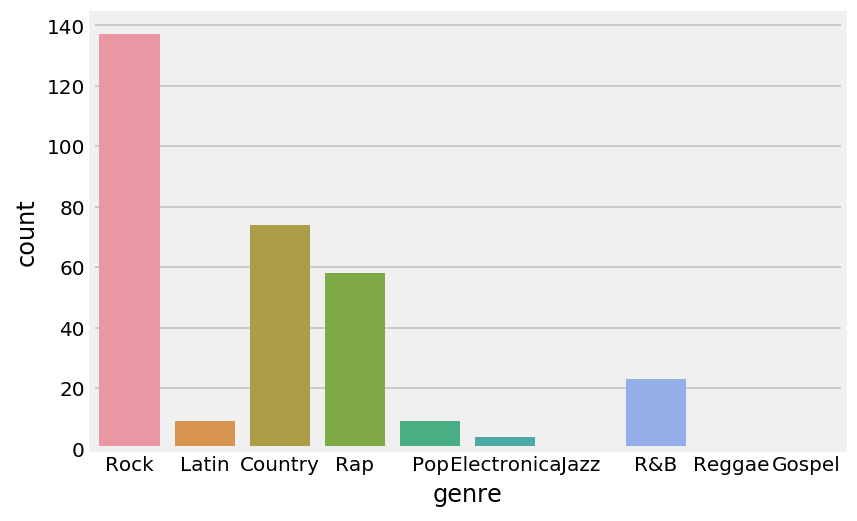

In [71]:
sns.countplot(x='genre', data=df)

In [72]:
df.describe()

,year,1st.week,2nd.week,3rd.week,4th.week,5th.week,6th.week,7th.week,8th.week,9th.week,...,56th.week,57th.week,58th.week,59th.week,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week
count,317.0,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,2000.0,79.958991,70.050473,62.993691,56.558360,51.895899,46.249211,41.766562,38.646688,36.987382,...,0.160883,0.173502,0.198738,0.223975,0.239748,0.268139,0.280757,0.299685,0.315457,0.154574
std,0.0,14.686865,20.122189,23.381535,25.562047,27.423747,28.501905,29.503096,29.974168,30.568141,...,2.022653,2.184133,2.498404,2.829041,3.014616,3.370670,3.534644,3.772204,3.965218,2.752114
min,2000.0,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.0,74.000000,62.000000,52.000000,41.000000,34.000000,24.000000,17.000000,10.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.0,81.000000,73.000000,66.000000,60.000000,55.000000,47.000000,41.000000,36.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.0,91.000000,83.000000,79.000000,74.000000,71.000000,68.000000,62.000000,60.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,26.000000,29.000000,32.000000,39.000000,39.000000,43.000000,47.000000,50.000000,50.000000,49.000000


In [80]:
df['64th.week'].value_counts()

0.0     315
50.0      2
Name: 64th.week, dtype: int64

In [79]:
remove
for i in df.columns:
    try:
        

Object `del` not found.
